## Investigation Overview

In this presentation. Many visualizations on (Ford GoBike System Data characterics will be created to study their relationship on duration_sec The main characterics are start_time, end_time, start_station_name, end_station_name, start_station_name and, user_type , year-month ,start_station_latitude , start_station_longitude , end_station_latitude , end_station_longitude , is the most helpful features to help my go through the investigation part in our dataset

## Dataset Overview 

There are 519700 bike in our dataset with 13 feature (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id ,end_station_name, end_station_latitude, end_station_longitude, bike_id and, user_type), most of the variables are numeric, and some of them categorical variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

In [2]:
# append all trip data together

folder_name = 'Data'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '2017-fordgobike-tripdata.csv'))]
fordgobike_2017 = pd.concat(frames, ignore_index=True)
print(fordgobike_2017.shape)
fordgobike_2017.sample(5)

(519700, 13)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
227353,444,2017-10-19 09:40:03.3450,2017-10-19 09:47:28.1030,9,Broadway at Battery St,37.798572,-122.400869,22,Howard St at Beale St,37.789756,-122.394643,2906,Subscriber
275223,1420,2017-10-05 08:40:41.1280,2017-10-05 09:04:21.2630,106,Sanchez St at 17th St,37.763242,-122.430675,23,The Embarcadero at Steuart St,37.791464,-122.391034,3109,Customer
45360,958,2017-12-12 18:44:05.3030,2017-12-12 19:00:03.6790,81,Berry St at 4th St,37.775880,-122.393170,33,Golden Gate Ave at Hyde St,37.781650,-122.415408,1678,Subscriber
53911,505,2017-12-10 16:21:33.8390,2017-12-10 16:29:59.3150,6,The Embarcadero at Sansome St,37.804770,-122.403234,6,The Embarcadero at Sansome St,37.804770,-122.403234,840,Customer
73612,722,2017-12-05 08:27:52.9610,2017-12-05 08:39:55.8260,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,3269,Subscriber


In [3]:
#Change start_time and end_time from object AKA string to datetime
fordgobike_2017['start_time'] = pd.to_datetime(fordgobike_2017['start_time'])
fordgobike_2017['end_time'] = pd.to_datetime(fordgobike_2017['end_time'])

#Change user_type from object AKA string to category 
fordgobike_2017['user_type'] = fordgobike_2017.user_type.astype('category')

In [4]:
fordgobike_2017[['start_time', 'end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

In [5]:
fordgobike_2017['year-month'] = pd.to_datetime(fordgobike_2017['start_time']).dt.to_period('M')
fordgobike_2017['year-month'].sample(5)

274511    2017-10
332586    2017-09
488777    2017-07
415644    2017-08
96992     2017-11
Name: year-month, dtype: period[M]

In [6]:
fordgobike_2017['duration_min'] = fordgobike_2017['duration_sec'] // 60

### How long are people riding these bikes?

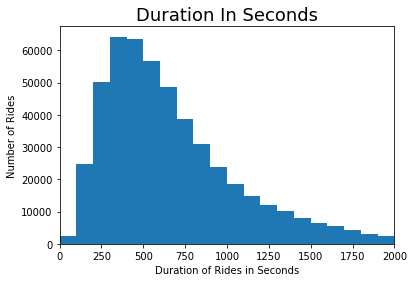

In [7]:
#Visualizing the data in a histogram
duration_bins = np.arange(0, fordgobike_2017['duration_sec'].max() + 100, 100)
plt.hist(data = fordgobike_2017, x = 'duration_sec', bins = duration_bins);

plt.xlim(0, 2000);
plt.title('Duration In Seconds', fontsize = 18);
plt.xlabel('Duration of Rides in Seconds');
plt.ylabel('Number of Rides');

#### Observation : 
As we can see in this analysis, we have a distribution of how much time people spend on the bikes, there are  some outliers in the high end and it skewed the data, so what I did is I put a limit of 2000 seconds, so it’s still right skewed , and as we can see the peak of people using them falls between 250-750 seconds range, or to be exact it’s almost 275 seconds, so that’s mean it’s nearly 4.5 minutes , so we can say that the people using the bikes mostly for quick rides

### relationship between (Customer) and (Subscriber)

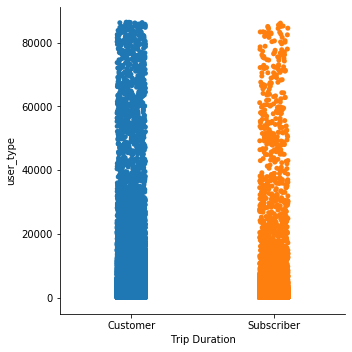

In [8]:
sb.catplot(x="user_type", y="duration_sec", data=fordgobike_2017)
plt.xlabel('Trip Duration')
plt.ylabel('user_type');

#### Observation : 
in this chart we see the (Subscribers) often finish the race faster than the (Customers)

### 10 Most common places for starting and end a trip

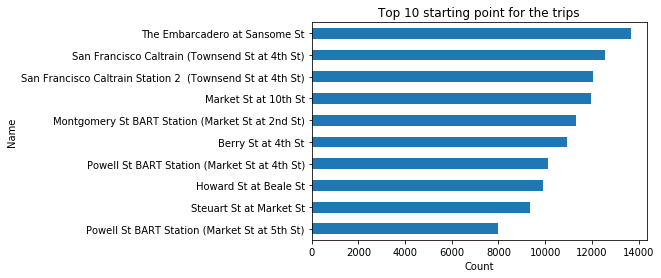

In [9]:
top_names = fordgobike_2017.start_station_name.value_counts()[1:11].sort_values()
df_color = sb.color_palette()[0]
top_names.plot(kind = 'barh', color=df_color)
plt.title('Top 10 starting point for the trips')
plt.xlabel('Count')
plt.ylabel('Name');

 #### Observation : 
Most of the trips are initiated from The Embarcadero at Sansome St .

## duration_min vs year-month on each Customer and Subscriber

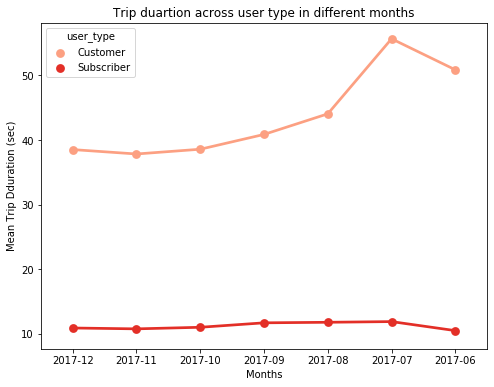

In [10]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = fordgobike_2017, x = 'year-month' , y = 'duration_min' , hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Trip duartion across user type in different months')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Months')
plt.show();

##### Observation: 
Customers have more distance than the subscriber for all the month